# Predict Stock Prices by Time Series Analysis 

In [22]:
import pandas as pd
data = pd.read_csv('aadr.us.txt',parse_dates=['Date'], index_col='Date',date_parser=dateparse)

In [23]:
data

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.3330,23.9460,23.9460,43321,0
2010-07-22,24.644,24.6440,24.3620,24.4870,18031,0
2010-07-23,24.759,24.7590,24.3140,24.5070,8897,0
2010-07-26,24.624,24.6240,24.4490,24.5950,19443,0
2010-07-27,24.477,24.5170,24.4310,24.5170,8456,0
...,...,...,...,...,...,...
2017-11-06,57.610,57.7372,57.2285,57.6500,41601,0
2017-11-07,57.290,57.3460,57.1446,57.2850,50935,0
2017-11-08,57.310,57.5500,57.2200,57.4900,71770,0


In [24]:
df[df.isnull().any(axis=1)]
import pandas as pd
import numpy as np

C:\Users\Siddhartha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


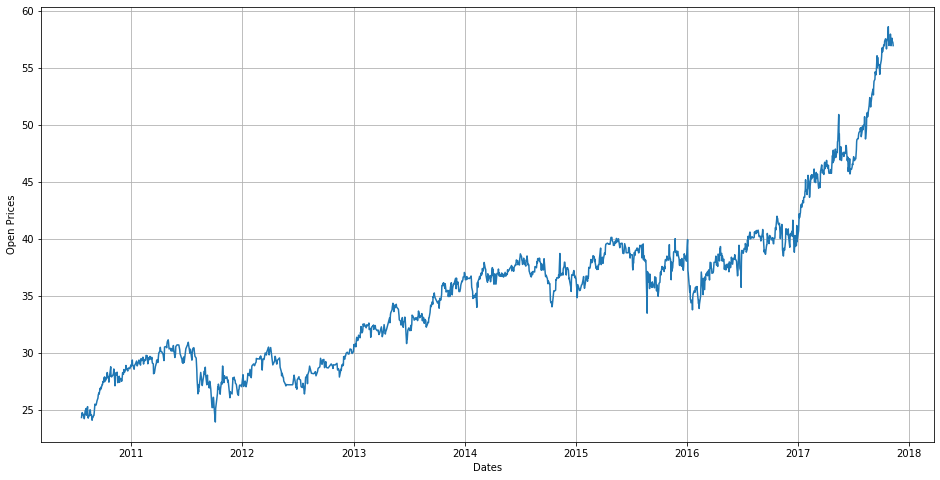

In [25]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open']);

In [42]:
df = data['Open']
#Print Rolling Averages and Rolling Standard Deviations:

rolmean = df.rolling(window = 12).mean()
rolstd = df.rolling(window = 12).std()
print(rolmean,rolstd)

Date
2010-07-21          NaN
2010-07-22          NaN
2010-07-23          NaN
2010-07-26          NaN
2010-07-27          NaN
                ...    
2017-11-06    57.548058
2017-11-07    57.548892
2017-11-08    57.520558
2017-11-09    57.453975
2017-11-10    57.315642
Name: Open, Length: 1565, dtype: float64 Date
2010-07-21         NaN
2010-07-22         NaN
2010-07-23         NaN
2010-07-26         NaN
2010-07-27         NaN
                ...   
2017-11-06    0.484805
2017-11-07    0.484311
2017-11-08    0.487791
2017-11-09    0.466130
2017-11-10    0.308193
Name: Open, Length: 1565, dtype: float64


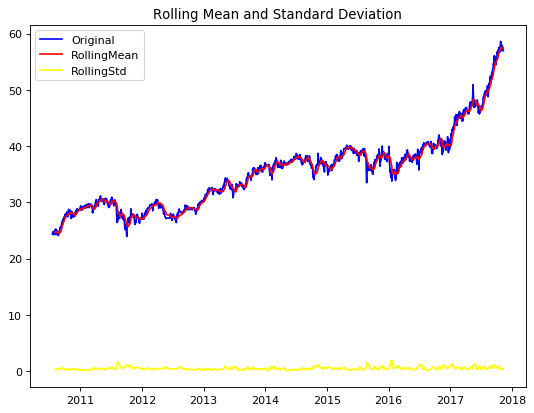

In [44]:
# Plot Rolling Statistics:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
orig = plt.plot(df, color = 'blue', label = 'Original')
mean = plt.plot(rolmean,color ='red',label='RollingMean')
std = plt.plot(rolstd, color = 'yellow', label='RollingStd')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [45]:
#Dickey Fuller's Test:

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fullers Test:')

dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['TestStatistic','p-value','#lags','#Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

Results of Dickey Fullers Test:
TestStatistic              1.102050
p-value                    0.995234
#lags                      9.000000
#Observations           1555.000000
Critical Value (1%)       -3.434562
Critical Value (5%)       -2.863400
Critical Value (10%)      -2.567760
dtype: float64


# Plotting Autocorrelation

No handles with labels found to put in legend.


          t-1       t+1
t-1  1.000000  0.904374
t+1  0.904374  1.000000


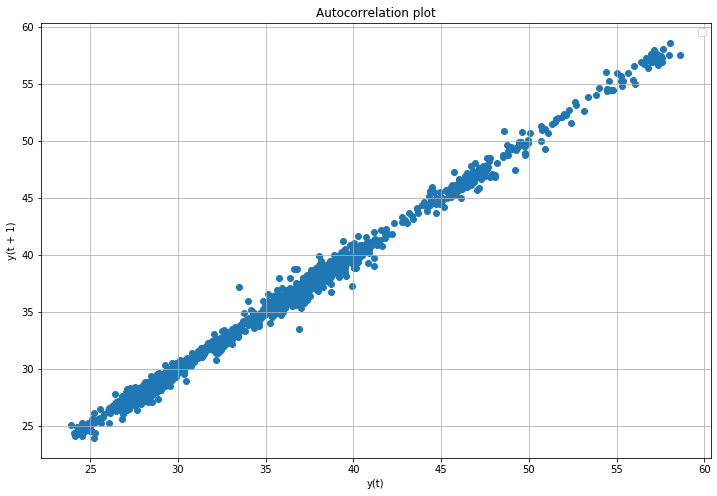

In [26]:
from pandas.plotting import lag_plot
plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=1)
plt.title('Autocorrelation plot')
plt.grid(True)
plt.legend();

from pandas import DataFrame
from pandas import concat
values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(120), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

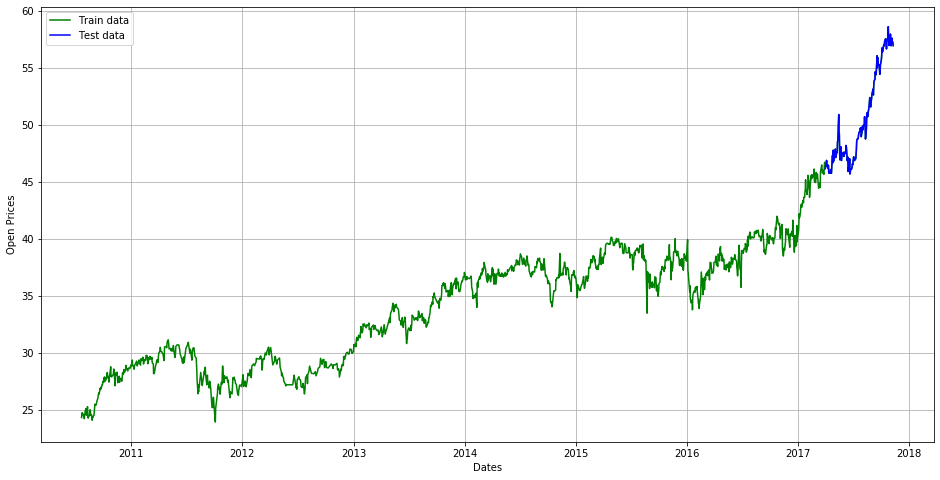

In [27]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

# Firstly, we use the AR Model:

In [28]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [29]:
train_ar = train_data['Open']
test_ar = test_data['Open']

In [30]:
# train AR Model
model = AR(train_ar)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

C:\Users\Siddhartha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
# walk forward over time steps in test
history = train_ar[len(train_ar)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)

Lag: 23


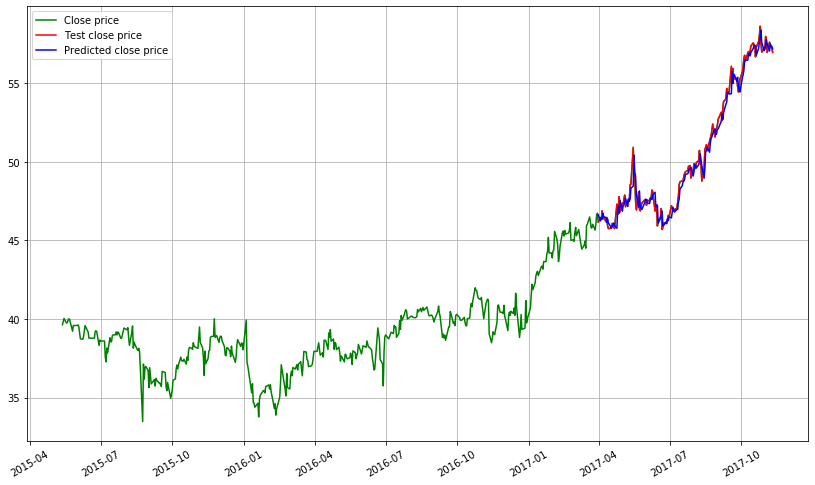

In [32]:
plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.k_ar)
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test close price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted close price')
plt.xticks(rotation=30)
plt.grid(True)
plt.legend()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test_data['Open'], predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Open'], predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Open'], predictions))
print('RMSE: '+str(rmse))

MSE: 0.3179978521509835
MAE: 0.4174238701265478
RMSE: 0.5639129827827902


In [34]:
predictions

[46.631663701602555,
 46.238877238874835,
 46.463480852271935,
 46.36650748323271,
 46.74368942998654,
 46.512623557404716,
 46.45563030029672,
 46.15357263511072,
 46.3701173279078,
 46.12065409943421,
 45.78722863701234,
 45.88917786251534,
 46.00801162007049,
 46.10498601493079,
 45.92717006618298,
 45.778676736672246,
 46.95111877422696,
 47.20862096484935,
 46.749951323090336,
 47.5528221346643,
 46.86014148809443,
 47.22501408423176,
 47.29093304245298,
 47.47656478472449,
 47.69522136976301,
 47.157080232147,
 47.6283262197161,
 47.49398570296282,
 47.639957145421576,
 48.31707899181131,
 48.45688373774064,
 50.41730492648879,
 49.31130338754661,
 49.07758329696299,
 47.86786572825203,
 47.109818621035124,
 48.14834605843006,
 47.151516523153084,
 47.04383751580117,
 46.96790308897308,
 47.42763946418574,
 47.63078301691381,
 47.57897740282598,
 47.38020005632228,
 47.345933563216924,
 47.7067175583377,
 47.68397117598303,
 47.600588292501634,
 47.9010300476398,
 48.064046971486

In [49]:
test_data['Open']

Date
2017-03-31    46.165
2017-04-03    46.443
2017-04-04    46.364
2017-04-05    46.890
2017-04-06    46.364
               ...  
2017-11-06    57.610
2017-11-07    57.290
2017-11-08    57.310
2017-11-09    57.230
2017-11-10    56.960
Name: Open, Length: 157, dtype: float64

# ARIMA  Model

<Figure size 1152x576 with 0 Axes>

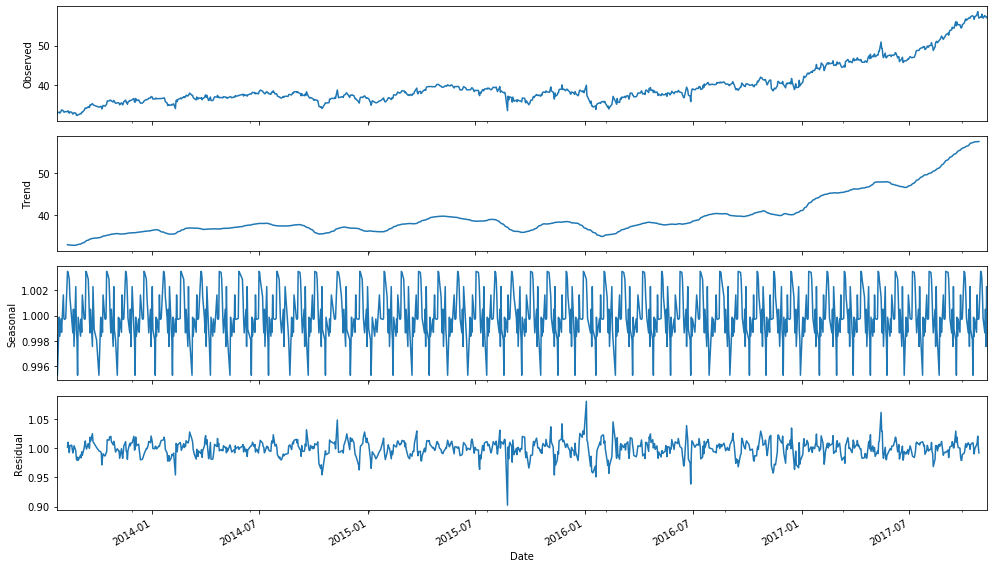

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['Open']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=20)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [38]:
#Training and Testing the Model:
from statsmodels.tsa.arima_model import ARIMA

train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

C:\Users\Siddhartha\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MSE: 0.3077241141669849
MAE: 0.40739841695301815
RMSE: 0.5547288654531914


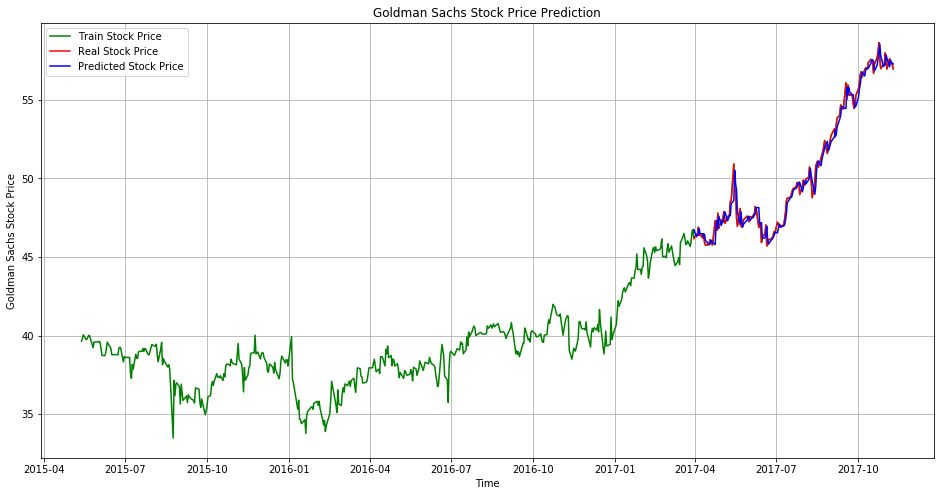

In [40]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goldman Sachs Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
predictions

[array([46.73195108]),
 array([46.28505393]),
 array([46.41140222]),
 array([46.39663641]),
 array([46.81398174]),
 array([46.47761465]),
 array([46.47173534]),
 array([46.26357172]),
 array([46.43285118]),
 array([46.05055427]),
 array([45.80825442]),
 array([45.79220213]),
 array([46.04827035]),
 array([46.05487811]),
 array([45.89890781]),
 array([45.79223295]),
 array([47.04563615]),
 array([47.30239697]),
 array([46.81617833]),
 array([47.60448908]),
 array([47.00940517]),
 array([47.2827576]),
 array([47.22475017]),
 array([47.5520043]),
 array([47.85366901]),
 array([47.29672687]),
 array([47.46469789]),
 array([47.62388327]),
 array([47.6287564]),
 array([48.38464916]),
 array([48.59152599]),
 array([50.50127431]),
 array([49.62257858]),
 array([49.25713229]),
 array([47.8393455]),
 array([47.06099043]),
 array([47.88541571]),
 array([47.21853707]),
 array([46.91956697]),
 array([47.09204159]),
 array([47.3466537]),
 array([47.57330492]),
 array([47.55028131]),
 array([47.30980